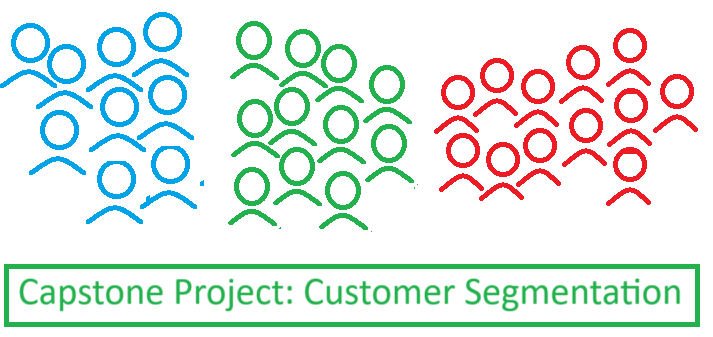







#  <font color ='Green'>🗂️Customer Segmentation🗂️</font>

## Table of Contents

### 💠Problem Statement
### 💠Project Objective
### 💠Data Description
### 💠Data Pre-processing Steps 
### 💠Analysing the DataFrame     
### 💠Choosing the Algorithm for the Project           ➡️KMeans
### 💠Analysing Clusters of Customers from Model
### 💠Frequently Brought Together          ➡️FPgrowth
### 💠Inferences
### 💠Future Possibilities of the Project
### 💠Conclusion
### 💠References


## [💠Problem Statement 💠]

### <font color ='Grey' > *️⃣An online retail store is trying to understand the various customer purchase patterns for theirfirm, you are required to give enough evidence based insights to provide the same.</font>
  
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Project Objective💠]

### <font color ='Grey' > *️⃣Segment the customers based on their purchasing behavior.</font> 

### <font color ='Grey' > *️⃣find useful insights about the customer purchasing historythat can be an added advantage for the online retailer..</font> 
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Data Description💠]

### <font color ='Grey' > *️⃣The online_retail.csv contains 387961 rows and 8 columns.</font> 

### <font color ='Grey' >Feature Name    Description</font> 

    ►Invoice        Invoice number
    ►StockCode     Product ID
    ►Description   Product Description
    ►Quantity      Quantity of the product
    ►InvoiceDate   Date of the invoice
    ►Price         Price of the product per unit
    ►CustomerID    Customer ID
    ►Country       Region of Purchase
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Data Pre-processing Steps💠]

### <font color ='Grey'>▶Checking Shape and rows of Data Frame  </font> 
### <font color ='Grey'>▶Checking Dtype of columns </font> 
### <font color ='Grey'>▶Checking for NULL values </font> 
### <font color ='Grey'>▶Checking for Duplicate records </font> 
### <font color ='Grey'>▶Correcting Dtype of columns and creating necessary columns </font>
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
Data=pd.read_csv('OnlineRetail (3).csv',encoding='unicode_escape')
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(Data.isnull().sum())
print('# Shape of data',Data.shape)
print('____________________________________________')
Data=Data.dropna()
print(Data.isnull().sum())
print('# Shape of data',Data.shape)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
# Shape of data (541909, 8)
____________________________________________
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
# Shape of data (406829, 8)


In [4]:
print('# Number of duplicate rows ', Data.duplicated().sum())
print('# Shape of data',Data.shape)
print('____________________________________________')
Data=Data.drop_duplicates()
print('# Number of duplicate rows ', Data.duplicated().sum())
print('# Shape of data',Data.shape)

# Number of duplicate rows  5225
# Shape of data (406829, 8)
____________________________________________
# Number of duplicate rows  0
# Shape of data (401604, 8)


In [5]:
Data.describe()
#Here we can observe a problem that some quantities are negative,hence eleminating the records with negative quantities.

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
Data['Sales']=Data['Quantity']*Data['UnitPrice']
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
Data=Data[Data['Sales']>0]
Data.shape

(392692, 9)

In [8]:
Data['InvoiceDate']=pd.to_datetime(Data['InvoiceDate'])
Data['CustomerID']=Data['CustomerID'].astype(str)

## [💠Analysing the DataFrame💠][EDA]
### <font color ='Grey' > ▶Customer Distribution</font>
### <font color ='Grey' > ▶Top Selling Products</font>
### <font color ='Grey' > ▶Outliers detection and treatment</font>
### <font color ='Grey' > ▶Function : product_quantity_analysis</font>
### <font color ='Grey' > ▶Sales distribution per month</font>

## 💠Customer Distribution
### <font color ='Grey' > ▶it is clear that majority customers are from United Kingdom  88.92%</font>


**** From the below graph it is clear that majority customers are from United Kingdom  88.92541737544947 ****


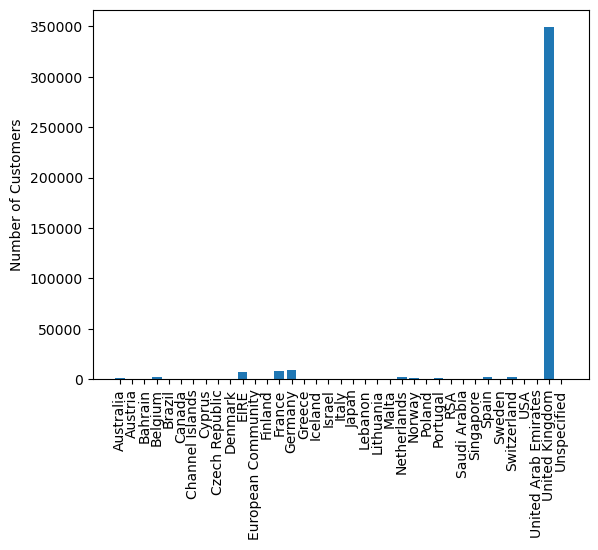

In [9]:
Custom_distribution=Data.groupby('Country')['CustomerID'].count() 
Custom_distribution=pd.DataFrame(Custom_distribution)

plt.bar(Custom_distribution.index,Custom_distribution['CustomerID'])
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

Percentage=(Data['Country'].value_counts()[0]/Data['Country'].value_counts().sum())*100
print('**** From the below graph it is clear that majority customers are from United Kingdom ',Percentage,'****')

plt.show()



## 💠Top Selling Products 

###  <font color ='Grey' >'Top_Sales_product' this function will retrive the top performing product based on sales.</font>

For tabular output give table=True in params
***********  Top (1 to 10) product based on sales  ***********


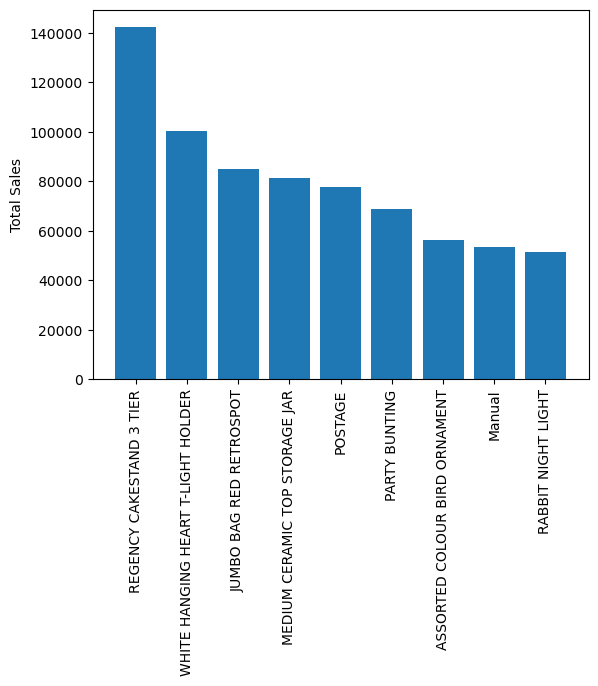

,Sales
Description,
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68785.23
ASSORTED COLOUR BIRD ORNAMENT,56413.03
Manual,53419.93
RABBIT NIGHT LIGHT,51251.24


In [10]:
def Top_Sales_product (y=5,x=0,table=False):
    print('For tabular output give table=True in params' )
    if(y<x):
        x,y=y,x
    Sales=Data.groupby('Description')['Sales'].sum()
    Sales=pd.DataFrame(Sales).sort_values('Sales',ascending=False)
    Sales=Sales[x:y]
    print(f'***********  Top ({x} to {y}) product based on sales  ***********')
    plt.bar(Sales.index,Sales['Sales'])
    plt.xticks(rotation=90)
    plt.ylabel('Total Sales')
    plt.show()
    if(table==True):
        return(Sales)
    

Top_Sales_product(1,10,True)

## 💠Outliers detection and treatment
### <font color ='Grey' > ▶Outliers treatment for function 'product_quantity_analysis'</font>
###  <font color ='Grey' >▶Creating necessary columns for the function </font>

In [11]:
data=Data
data['Month']=Data['InvoiceDate'].dt.month
data['Year']=Data['InvoiceDate'].dt.year
data=data.drop(['Sales'],axis=1)
data=data.sort_values(by='InvoiceDate')
data=data.set_index('InvoiceDate')
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month,Year
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12,2010
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12,2010
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12,2010
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12,2010
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12,2010


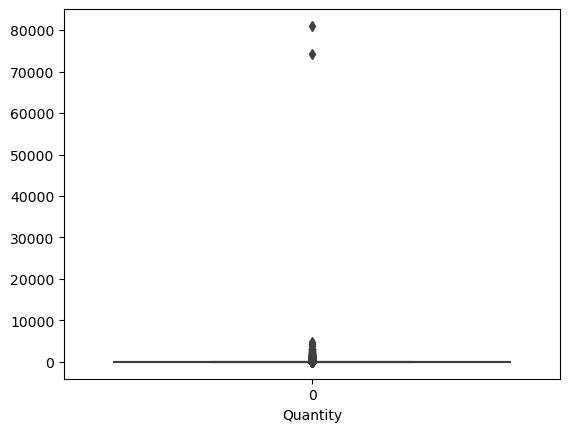

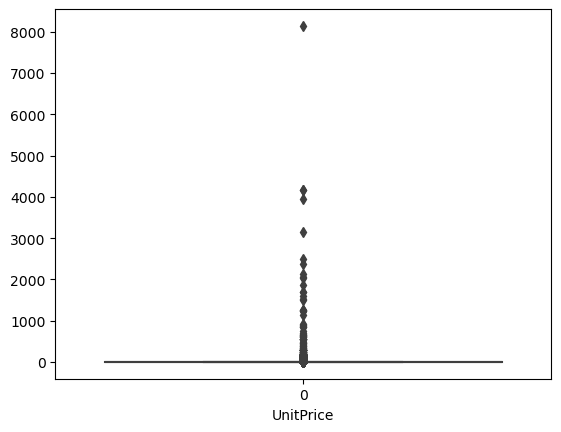

In [12]:
col=['Quantity','UnitPrice']

for i in col:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [13]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_25444\2242722683.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data.quantile(0.25)
C:\Users\MAYUR\AppData\Local\Temp\ipykernel_25444\2242722683.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data.quantile(0.75)


In [14]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_25444\2520746827.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


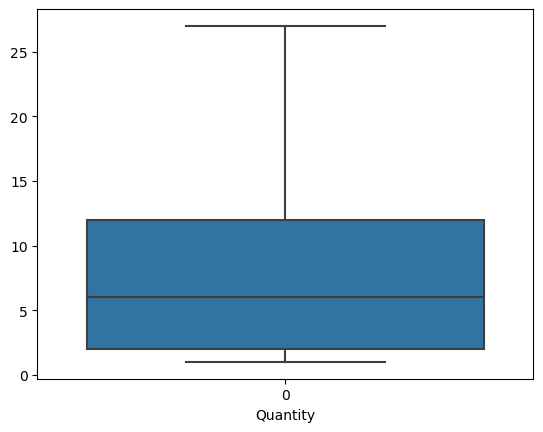

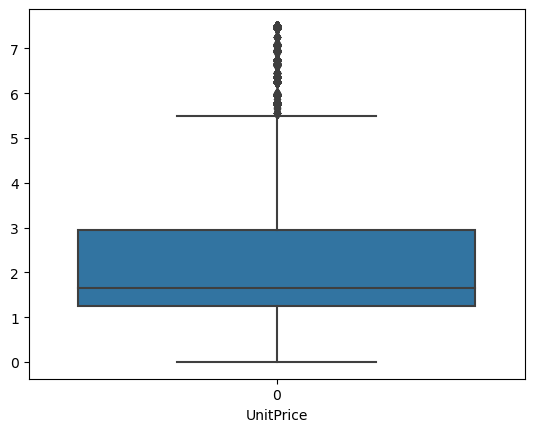

In [15]:

col=['Quantity','UnitPrice']

for i in col:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [16]:
data['Sales']=data['Quantity']*data['UnitPrice']
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month,Year,Sales
InvoiceDate,,,,,,,,,,
2011-01-04 10:00:00,539993,22862,LOVE HEART NAPKIN BOX,4,4.25,13313.0,United Kingdom,1,2011,17.0
2011-01-04 10:00:00,539993,22458,CAST IRON HOOK GARDEN FORK,8,2.55,13313.0,United Kingdom,1,2011,20.4
2011-01-04 10:00:00,539993,22808,SET OF 6 T-LIGHTS EASTER CHICKS,12,2.95,13313.0,United Kingdom,1,2011,35.4
2011-01-04 10:00:00,539993,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2.95,13313.0,United Kingdom,1,2011,35.4
2011-01-04 10:00:00,539993,22302,COFFEE MUG PEARS DESIGN,6,2.55,13313.0,United Kingdom,1,2011,15.3
2011-01-04 10:00:00,539993,22303,COFFEE MUG APPLES DESIGN,6,2.55,13313.0,United Kingdom,1,2011,15.3
2011-01-04 10:00:00,539993,22896,PEG BAG APPLES DESIGN,6,2.55,13313.0,United Kingdom,1,2011,15.3
2011-01-04 10:00:00,539993,22898,CHILDRENS APRON APPLES DESIGN,8,1.95,13313.0,United Kingdom,1,2011,15.6
2011-01-04 10:00:00,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,3.25,13313.0,United Kingdom,1,2011,19.5


## 💠Function : product_quantity_analysis
### <font color ='Grey' > ▶The function will underline the order quantity analysis based on order month.</font>

***** Has to give more attention on stock of RED RETROSPOT CHILDRENS UMBRELLA for below months *****
        Quantity  Avg_Quantity
Months                        
1            113            72
9            176            72
10           133            72
11           117            72
__________________________________________________________________________________________
***** These are months of very low sales of RED RETROSPOT CHILDRENS UMBRELLA *****
        Quantity  Avg_Quantity
Months                        
4             24            72
5             23            72
12            33            72
__________________________________________________________________________________________


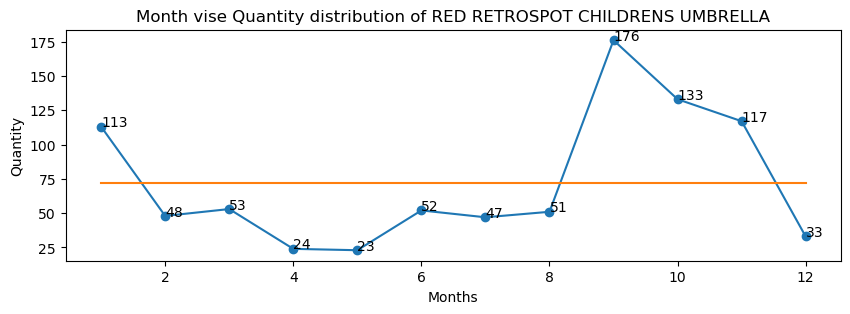

In [17]:
def product_quantity_analysis(prod):
    entries=l=[0 for i in range(12)]
    months=[i for i in range(1,13)]
    
    MQ=data[data['Description']==prod].groupby('Month')['Quantity'].sum()
    
    for i in MQ.index:
        if(MQ[i]>0):
            entries[i-1]=MQ[i]
            
    MQ=pd.DataFrame({'Months':months,'Quantity':entries})
    MQ=MQ.set_index('Months')
    MQ['Avg_Quantity']=int(MQ.mean()['Quantity'])
    
    print(f'***** Has to give more attention on stock of {prod} for below months *****')
    print(MQ[MQ['Quantity']>1.25*MQ.mean()['Quantity']])
    
    print('__________________________________________________________________________________________')
    
    print(f'***** These are months of very low sales of {prod} *****')
    print(MQ[MQ['Quantity']<0.5*MQ.mean()['Quantity']])
    
    print('__________________________________________________________________________________________')
    
    plt.figure(figsize=(10,3))
    plt.plot(MQ['Quantity'])
    plt.plot(MQ['Avg_Quantity'])
    plt.scatter(x=months,y=MQ['Quantity'])
    
    for i,text in enumerate(MQ['Quantity']):
        plt.annotate(text,(months[i],MQ['Quantity'].iloc[i]))
        
    plt.xlabel('Months')
    plt.ylabel('Quantity')
    plt.title(f'Month vise Quantity distribution of {prod}')
    plt.show()
         

product_quantity_analysis('RED RETROSPOT CHILDRENS UMBRELLA')    

## 💠Sales distribution per month

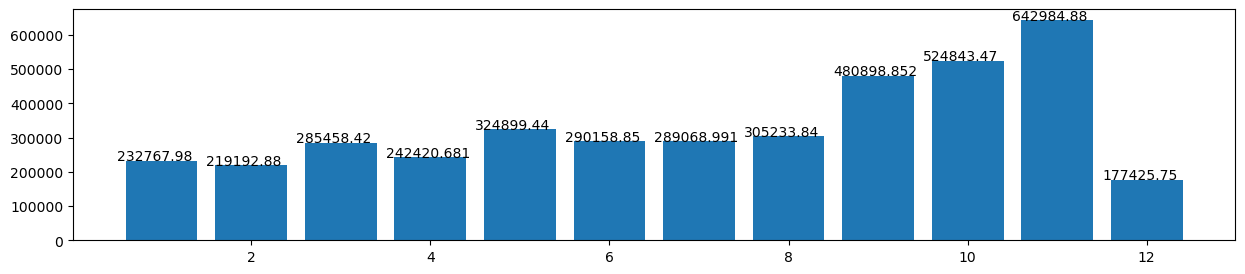

In [18]:
Sales=data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(15,3))
plt.bar(height=Sales,x=Sales.index)

for i,t in enumerate(Sales):
    plt.annotate(t,(Sales.index[i]-0.5,Sales.iloc[i]))

plt.show()

## [💠Choosing the Algorithm For the Project💠]
### <font color ='Grey'>*️⃣ K-Means clustering is an efficient machine learning algorithm to solve data clustering problems. It’s an unsupervised algorithm that’s quite suitable for solving customer segmentation problems because, 
    ▶Easy to use: The k-means algorithm is simple to understand and implement
    ▶Fast and efficient: It's computationally efficient and can handle large datasets
    ▶No assumptions: It can be used without any assumptions about the data engineering process. </font> 
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## 💠Model building & Segmentation


In [19]:
Customer=pd.DataFrame(data.groupby('CustomerID')['Sales'].sum())         #Creating a dataframe for customer segmentation
Customer['No_orders']= data.groupby('CustomerID')['Sales'].count()
Customer.head()

,Sales,No_orders
CustomerID,,
12347.0,2663.84,137
12348.0,37.40,2
12349.0,999.15,58
12350.0,294.40,16
12352.0,1130.94,66


C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\clust

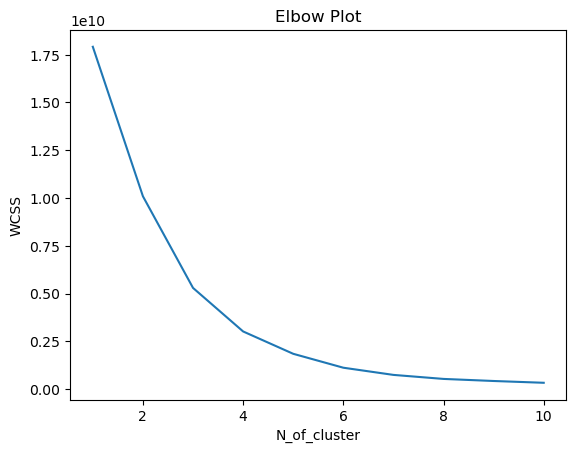

In [20]:
from sklearn.cluster import KMeans

N_of_cluster=list(range(1,11))
wcss=[]

for n in N_of_cluster:
    model_kmeans=KMeans(n_clusters=n,max_iter=100,random_state=100)
    model_kmeans.fit(Customer)  
    wcss.append( model_kmeans.inertia_)
    
plt.plot(N_of_cluster,wcss)
plt.xlabel('N_of_cluster')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [21]:
model_kmeans=KMeans(n_clusters=5,max_iter=100,random_state=100)
model_kmeans.fit(Customer) 

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=5, random_state=100)

In [22]:
Customer['Cluster_ID']=model_kmeans.labels_
Customer.head()

,Sales,No_orders,Cluster_ID
CustomerID,,,
12347.0,2663.84,137,4
12348.0,37.40,2,0
12349.0,999.15,58,0
12350.0,294.40,16,0
12352.0,1130.94,66,0


In [23]:
x=Customer.drop(columns='Cluster_ID',axis=1)
x=np.array(x)

yk=model_kmeans.fit_predict(x)
yk

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 0, ..., 0, 4, 0])

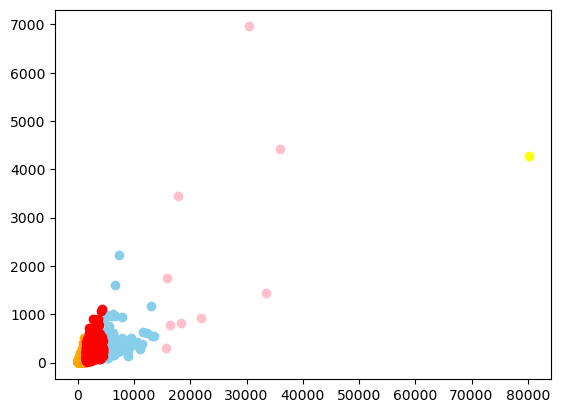

In [24]:
plt.scatter(x[yk==0,0],x[yk==0,1],color='orange')
plt.scatter(x[yk==1,0],x[yk==1,1],color='yellow')
plt.scatter(x[yk==2,0],x[yk==2,1],color='skyblue')
plt.scatter(x[yk==3,0],x[yk==3,1],color='pink')
plt.scatter(x[yk==4,0],x[yk==4,1],color='red')
plt.show()

In [25]:
print(Customer['Cluster_ID'].value_counts())
print('_________________________________________________________________')  
Customer=Customer[Customer['Cluster_ID'].isin([0,4,2])]                    #Here we are eliminating cluster 5 and 1 as they 
print(Customer['Cluster_ID'].value_counts())                               #very less number of elements

0    3302
4     663
2     101
3       9
1       1
Name: Cluster_ID, dtype: int64
_________________________________________________________________
0    3302
4     663
2     101
Name: Cluster_ID, dtype: int64


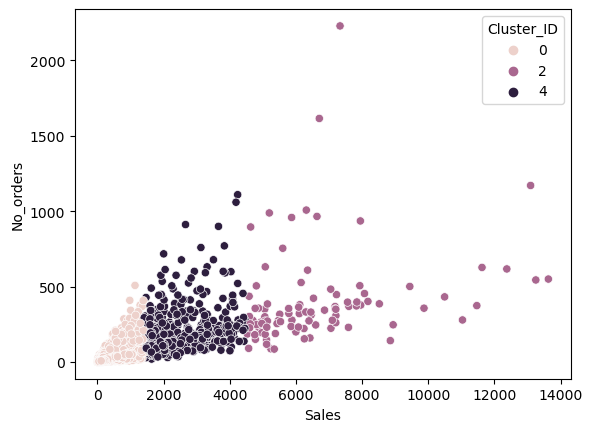

In [26]:
sns.scatterplot(data=Customer,x='Sales',y='No_orders',hue='Cluster_ID')
plt.show()

## [💠Analysing Clusters of Customers from Model 💠]

### -----------------------------------------------------------------------------------------------------------------------------------------------------------


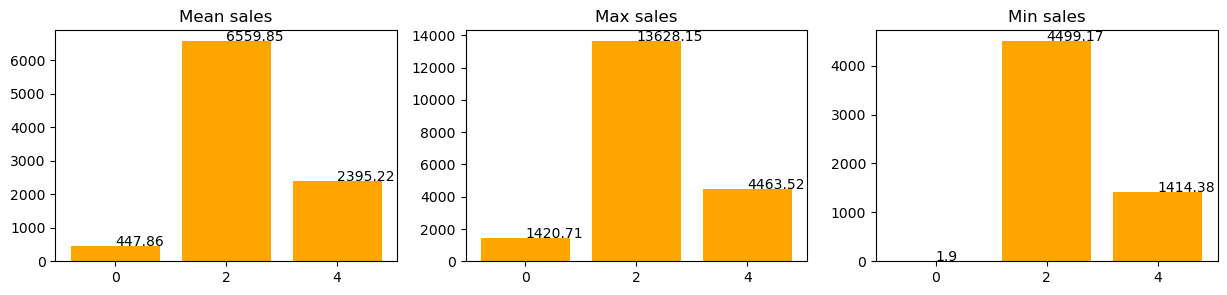

In [27]:
cl=list(Customer['Cluster_ID'].unique())
cl.sort()
Mean=[Customer[Customer['Cluster_ID']==i]['Sales'].mean() for i in cl]
Max=[Customer[Customer['Cluster_ID']==i]['Sales'].max() for i in cl]
Min=[Customer[Customer['Cluster_ID']==i]['Sales'].min() for i in cl]
cl=[str(i) for i in cl]
param=[Mean,Max,Min]

plt.figure(figsize=(15,3))
for i,t in enumerate(param):
    title=['Mean','Max','Min']
    plt.subplot(1,3,i+1)
    plt.bar(x=cl,height=t,color='orange')
    plt.title(f'{title[i]} sales')
    for j,tx in enumerate(t):
        plt.annotate(round(tx,2),(cl[j],t[j]))
    
plt.show()

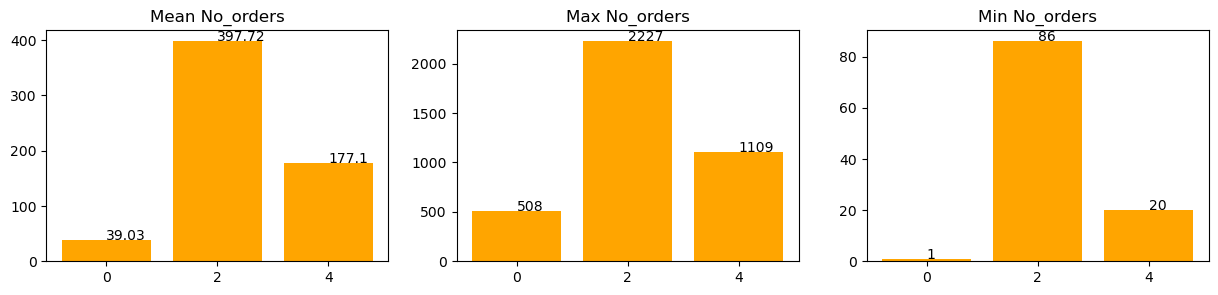

In [28]:
cl=list(Customer['Cluster_ID'].unique())
cl.sort()
Mean=[Customer[Customer['Cluster_ID']==i]['No_orders'].mean() for i in cl]
Max=[Customer[Customer['Cluster_ID']==i]['No_orders'].max() for i in cl]
Min=[Customer[Customer['Cluster_ID']==i]['No_orders'].min() for i in cl]
cl=[str(i) for i in cl]
param=[Mean,Max,Min]

plt.figure(figsize=(15,3))
for i,t in enumerate(param):
    title=['Mean','Max','Min']
    plt.subplot(1,3,i+1)
    plt.bar(x=cl,height=t,color='orange')
    plt.title(f'{title[i]} No_orders')
    for j,tx in enumerate(t):
        plt.annotate(round(tx,2),(cl[j],t[j]))
    
plt.show()

Total sales = 3729398.614
****** Sales according to Clusters ******
Cluster_ID
0    1478819.733
2     662545.140
4    1588033.741
Name: Sales, dtype: float64
____________________________________________________________


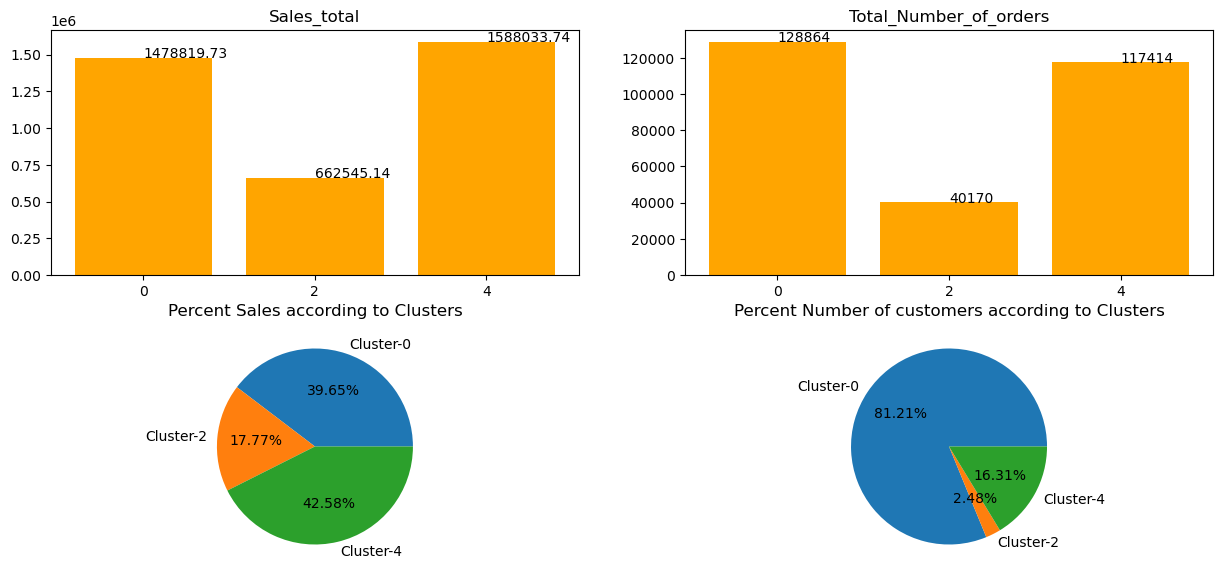

In [29]:
Total=Customer['Sales'].sum()
print(f'Total sales = {Total}')
print('****** Sales according to Clusters ******')
print(Customer.groupby('Cluster_ID')['Sales'].sum())
print("____________________________________________________________")


cl=list(Customer['Cluster_ID'].unique())
cl.sort()
Sales_total=[Customer[Customer['Cluster_ID']==i]['Sales'].sum() for i in cl]
Total_orders=[Customer[Customer['Cluster_ID']==i]['No_orders'].sum() for i in cl]

cl=[str(i) for i in cl]
param=[Sales_total,Total_orders]

plt.figure(figsize=(15,7))
for i,t in enumerate(param):
    title=['Sales_total','Total_Number_of_orders']
    plt.subplot(2,2,i+1)
    plt.bar(x=cl,height=t,color='orange')
    plt.title(f'{title[i]}')
    for j,tx in enumerate(t):
        plt.annotate(round(tx,2),(cl[j],t[j]))



plt.subplot(2,2,3)
plt.pie(Customer.groupby('Cluster_ID')['Sales'].sum(),autopct='%.2f%%',labels=['Cluster-0','Cluster-2','Cluster-4'])
plt.title('Percent Sales according to Clusters')

plt.subplot(2,2,4)
plt.pie(Customer.groupby('Cluster_ID')['Cluster_ID'].count(),autopct='%.2f%%',labels=['Cluster-0','Cluster-2','Cluster-4'])
plt.title('Percent Number of customers according to Clusters')

plt.show()

#### Cluster-0
▶These are the customers who orders very seldomly and are majority in numbers their mean sales is also the least but contributes to 39.65% of total sales.

#### Cluster-4
▶These are regular customers who have moderate mean sales and responsible for 42.58% of total sales,hence becomes the 
largest contributers.

#### Cluster-2
▶These are the customers who are frequent buyers and has about double mean sales as that of Cluster-4 customers.
Though they are only 2.48% there contribution to total sales is 17.77%

## [💠Frequently Brought Together  💠]

    ▶Identifying frequently brought combinations using fpgrowth
    ▶The function 'possiple_combo' will get the possible combos with respect to a product mentioned.
### -----------------------------------------------------------------------------------------------------------------------------------------------------------


In [30]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month,Year,Sales
InvoiceDate,,,,,,,,,,
2011-01-04 10:00:00,539993,22862,LOVE HEART NAPKIN BOX,4,4.25,13313.0,United Kingdom,1,2011,17.0
2011-01-04 10:00:00,539993,22458,CAST IRON HOOK GARDEN FORK,8,2.55,13313.0,United Kingdom,1,2011,20.4
2011-01-04 10:00:00,539993,22808,SET OF 6 T-LIGHTS EASTER CHICKS,12,2.95,13313.0,United Kingdom,1,2011,35.4
2011-01-04 10:00:00,539993,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2.95,13313.0,United Kingdom,1,2011,35.4
2011-01-04 10:00:00,539993,22302,COFFEE MUG PEARS DESIGN,6,2.55,13313.0,United Kingdom,1,2011,15.3


In [31]:
product =data['Description'].value_counts()                      #considering top 200 products for analysis
product=list(product[:200].index)


In [32]:
prod_data=data[data['Description'].isin(product)]
invoice_list=list(data['InvoiceNo'].unique())

In [33]:
fpgrowth_data=[]
for i in invoice_list:
    List=list(prod_data[prod_data['InvoiceNo']==i]['Description'])
    fpgrowth_data.append(List)
    
fpgrowth_data

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'JAM MAKING SET PRINTED',
  'JUMBO BAG RED RETROSPOT',
  'RED RETROSPOT SHOPPER BAG',
  'RECYCLING BAG RETROSPOT ',
  'JUMBO BAG PINK POLKADOT',
  'RECIPE BOX RETROSPOT '],
 [],
 [],
 ['SET OF 3 HEART COOKIE CUTTERS',
  'HANGING HEART JAR T-LIGHT HOLDER',
  'NATURAL SLATE HEART CHALKBOARD ',
  'HOMEMADE JAM SCENTED CANDLES',
  'JAM MAKING SET PRINTED',
  'SET OF 3 CAKE TINS PANTRY DESIGN ',
  'PACK OF 20 NAPKINS PANTRY DESIGN',
  'HANGING HEART ZINC T-LIGHT HOLDER',
  'ENAMEL FLOWER JUG CREAM'],
 ['REX CASH+CARRY JUMBO SHOPPER',
  'VICTORIAN GLASS HANGING T-LIGHT',
  'ROSES REGENCY TEACUP AND SAUCER '],
 ['MEMO BOARD RETROSPOT  DESIGN',
  'PLASTERS IN TIN CIRCUS PARADE ',
  'SET OF 3 HEART COOKIE CUTTERS',
  'PLASTERS IN TIN STRONGMAN',
  '60 TEATIME FAIRY CAKE CASES',
  'PACK OF 60 SPACEBOY CAKE CASES',
  'SET/5 RED RETROSPOT LID GLASS BOWLS',
  'CLOTHES PEGS RETROSPOT PACK 24 ',
  'JAM MAKING SET PRINTED',
  'SET/20 RED RETROSPOT PAPER NAPKIN

In [34]:
Fpgrowth_data=[]                                                                              #removing blank entries
for i in fpgrowth_data:
    if(len(i)!=0):
        Fpgrowth_data.append(i)

len(Fpgrowth_data)

13552

In [35]:
from mlxtend.preprocessing import TransactionEncoder

TE=TransactionEncoder()
FD_array=TE.fit(Fpgrowth_data).transform(Fpgrowth_data)
FD=pd.DataFrame(FD_array,columns=TE.columns_)
FD.head(3)

,3 STRIPEY MICE FELTCRAFT,4 TRADITIONAL SPINNING TOPS,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE PINK,...,WHITE HANGING HEART T-LIGHT HOLDER,WOOD 2 DRAWER CABINET WHITE FINISH,WOODEN BOX OF DOMINOES,WOODEN FRAME ANTIQUE WHITE,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN PICTURE FRAME WHITE FINISH,WOODEN SCHOOL COLOURING SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODLAND CHARLOTTE BAG,ZINC METAL HEART DECORATION
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
from mlxtend.frequent_patterns import fpgrowth

d=fpgrowth(FD, min_support=0.01,use_colnames=True)
d=pd.DataFrame(d)

In [37]:
def possiple_combo(prod):
    l=[i for i in d['itemsets'] if (prod in i) ]
    return(d[d['itemsets'].isin(l)])
    
possiple_combo('JUMBO BAG VINTAGE LEAF')

,support,itemsets
171,0.052981,(JUMBO BAG VINTAGE LEAF)
309,0.014094,"(JUMBO BAG VINTAGE LEAF, JUMBO SHOPPER VINTAGE..."
343,0.010331,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG STRAWBERRY)"
384,0.013799,"(JUMBO BAG VINTAGE LEAF, JUMBO STORAGE BAG SUKI)"
426,0.010626,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG BAROQUE BL..."
448,0.010626,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG PINK VINTAG..."
580,0.017636,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG ALPHABET)"
593,0.018964,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG APPLES)"
594,0.010257,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG APPLES, JUM..."
629,0.013872,"(JUMBO BAG VINTAGE LEAF, LUNCH BAG VINTAGE LEA..."


## [💠Inferences from Analysis💠]

▶The majority customers are from United Kingdom  (88.92%)

▶Cluster-0 : These are customers with highest numbers(81.21%) with sales of (39.65%) of total sales.

▶Cluster-4 : These are customers with second highest numbers(16.31%) with sales of (42.58%) of total sales.

▶Cluster-2 : These are customers with least numbers(2.48%) with sales of (17.77%) of total sales.

## [💠 Conclusion💠]

### <font color ='red'>▶Customers of Cluster-0 are buying products rarely. </font>
### <font color ='red'>▶Customers of Cluster-4 are buying products on regular basis and are loyal customers. </font>
### <font color ='red'>▶Customers of Cluster-2 are buying products most frequently. </font>
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Future Possibilities of the Project💠]

▶Intigrating more data of different countries will help the company to understand needs and behaviour of customers of different countries.  

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠 References💠]
▶Scikit-learn Documentation.(2024):KMeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

▶TKMeans: Intellipaat NLP lectures

▶Kaggle :FP-Growth Algorithm: Frequent Itemset Pattern :
https://www.kaggle.com/code/rjmanoj/fp-growth-algorithm-frequent-itemset-pattern

▶Matplotlib. (2024). Matplotlib Documentation. https://matplotlib.org/stable/api/pyplot_summary.html

### -----------------------------------------------------------------------------------------------------------------------------------------------------------